[View in Colaboratory](https://colab.research.google.com/github/christabella/simple-semi-supervised-learning/blob/master/SSL.ipynb)

In [0]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import keras

In [0]:
X, Y = make_moons(n_samples=400,noise=0.1,random_state=0)

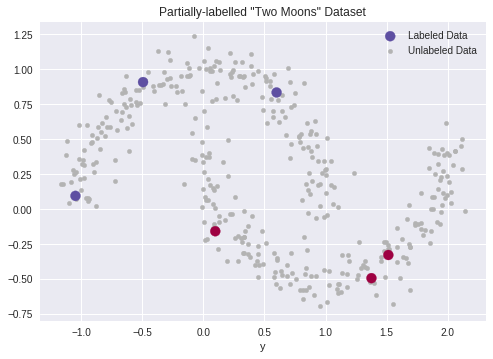

In [103]:
# Pick first 6 to be labeled
labeled_X = X[:6]
Y = Y[:6]

# The rest is unlabeled
unlabeled_X = X[6:]

# Color the labeled dataset
# COLORS = ['tab:pink','tab:purple']
# Taken from spectral https://github.com/matplotlib/matplotlib/blob/fb98a9a9a175d4912d88377ffd80bab24cff5fc1/lib/matplotlib/_cm.py#L793
RED = (0.61960784313725492, 0.003921568627450980, 0.25882352941176473)
PURPLE = (0.36862745098039218, 0.30980392156862746 , 0.63529411764705879)
COLORS = [PURPLE, RED]
colors = [COLORS[label] for label in Y]

unlabeled_plot = plt.scatter(x=unlabeled_X[:,0], y=unlabeled_X[:,1],
                             s=20, color="0.7")  # Pale gray is "0.7"
labeled_plot = plt.scatter(x=labeled_X[:,0], y=labeled_X[:,1],
                           s=100, color=colors)
plt.legend((labeled_plot, unlabeled_plot),
           ('Labeled Data', 'Unlabeled Data'),
           loc='upper right')
plt.title('Partially-labelled "Two Moons" Dataset')
plt.xlabel('x')
plt.xlabel('y')
plt.show()

In [0]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
#                                                     test_size=0.25,
#                                                     random_state=0)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [0]:
# Apply one-hot encoding to labels
encoding_train_y = np_utils.to_categorical(Y)

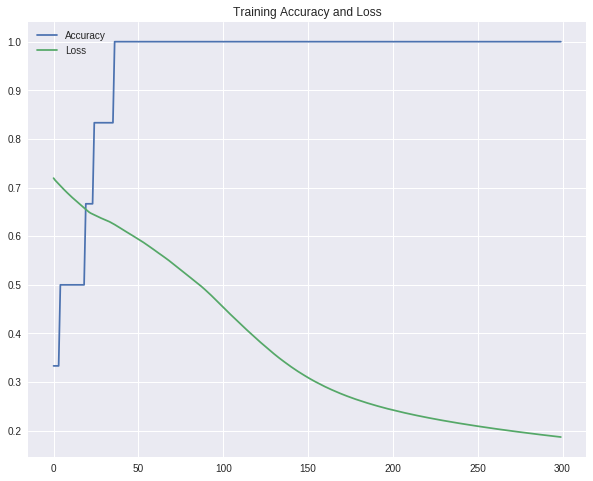

In [94]:
'''
"neural network with three hidden layers, each with 10 units, all with ReLU nonlinearities"
'''

n_input_dim = labeled_X.shape[1]
n_output_dim = 1 # Binary classification
n_hidden = 10

model = Sequential()
# First layer with four nodes, since each input data has shape (x, y).
model.add(Dense(10, input_dim=n_input_dim, activation='relu'))
# Two more hidden layers with 10 hidden neurons each.
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# Output layer with 2 output classes.
model.add(Dense(2, activation='softmax'))

# Compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
hist = model.fit(labeled_X, encoding_train_y, epochs=300, batch_size=10, verbose=0)

plt.figure(figsize=(10,8))
plt.plot(hist.history['acc'], label='Accuracy')
plt.plot(hist.history['loss'], label='Loss')
plt.legend(loc='best')
plt.title('Training Accuracy and Loss')
plt.show()

In [0]:
def plot_decision_boundary(prediction_model, X, Y):
    # Plot the decision boundary
    # Determine grid range in x and y directions
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1

    # Set grid spacing parameter
    spacing = min(x_max - x_min, y_max - y_min) / 100

    # Create grid
    XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                         np.arange(y_min, y_max, spacing))
    
    # Concatenate data to match input
    data = np.hstack([XX.ravel().reshape(-1,1), 
                      YY.ravel().reshape(-1,1)])

    # Get decision boundary probabilities
    db_prob = prediction_model.predict(data)

    # Convert probabilities to classes
#     clf = np.array([1 if x[0] < 0.5 else 0 for x in db_prob])
    clf = np.array([x[0] for x in db_prob])
    print("clf prob ", clf.shape)    

    Z = clf.reshape(XX.shape)

    plt.figure(figsize=(10,8))
    plt.contourf(XX, YY, Z, 20, cmap=plt.cm.Spectral, alpha=0.7)
    unlabeled_plot = plt.scatter(x=unlabeled_X[:,0], y=unlabeled_X[:,1],
                             s=20, color="0.7")  # Pale gray is "0.7"
    labeled_plot = plt.scatter(x=labeled_X[:,0], y=labeled_X[:,1],
                           s=100, color=colors)
    plt.show()

clf prob  (16500,)


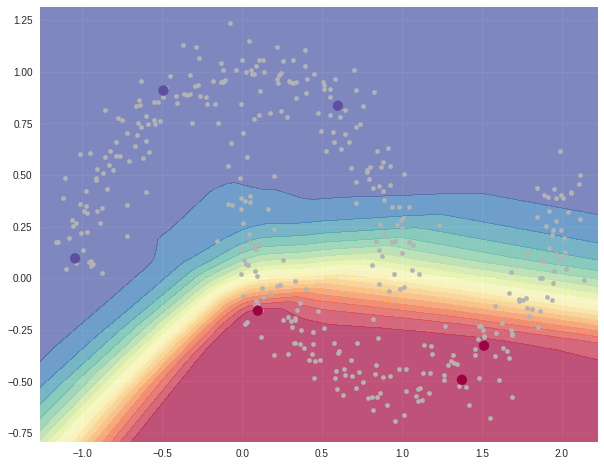

In [109]:
plot_decision_boundary(model, X, Y)